# Step 2: Feature Engineering
In this step, we need to build out features to uncover signals in teh data that could inform the churn model. Based on the data that is available and cleaned in step 1, let's build features to later use in our model! <br><br>
This stpe contains three parts:<br><br>
A. Feature Engineering<br>
B. Vaiable Correlation<br>
C. Removing Outliers<br>

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set(color_codes=True)

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
history_data = pd.read_pickle("processed_data history_data step1.pkl")
train = pd.read_pickle("processed_data train_data step1.pkl")

## A. Feature Engineering
Let's create new features using average of the year, the last six months and the last three months to our model

In [6]:
mean_year = history_data.groupby(["id"]).mean().reset_index()
mean_6m = history_data[history_data["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()
mean_3m = history_data[history_data["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()

In [7]:
mean_year.head(3)

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000


In [8]:
mean_6m.head(3)

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000


In [9]:
mean_year = mean_year.rename(index=str, columns = {"price_p1_var": "mean_year_price_p1_var",
                                                    "price_p2_var": "mean_year_price_p2_var",
                                                    "price_p3_var": "mean_year_price_p3_var",
                                                    "price_p1_fix": "mean_year_price_p1_fix",
                                                    "price_p2_fix": "mean_year_price_p2_fix",
                                                    "price_p3_fix": "mean_year_price_p3_fix"})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [10]:
features = mean_year

In [11]:
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


### A_1. New Variable
Let's define a new variable to provide us more date relevant insight.<br>
Define tenure = $date\_end$ $-$ $date\_active$

In [12]:
train["tenure"] = ((train["date_end"] - train["date_activ"]) / np.timedelta64(1, "Y")).astype(int)

In [13]:
train["tenure"]

0        3
1        3
2        7
3        6
4        6
        ..
16091    3
16092    4
16093    3
16094    4
16095    6
Name: tenure, Length: 16096, dtype: int32

In [14]:
tenure = train[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0) * 100)

In [15]:
tenure

churn,0,1
tenure,,
0,1.0,NaN
2,262.0,40.0
3,1178.0,193.0
4,3632.0,535.0
5,3010.0,297.0
6,3052.0,269.0
7,2649.0,210.0
8,162.0,11.0
9,94.0,2.0


In [16]:
tenure_percentage

churn,0,1
tenure,,
0,100.000000,NaN
2,86.754967,13.245033
3,85.922684,14.077316
4,87.161027,12.838973
5,91.019050,8.980950
6,91.900030,8.099970
7,92.654774,7.345226
8,93.641618,6.358382
9,97.916667,2.083333


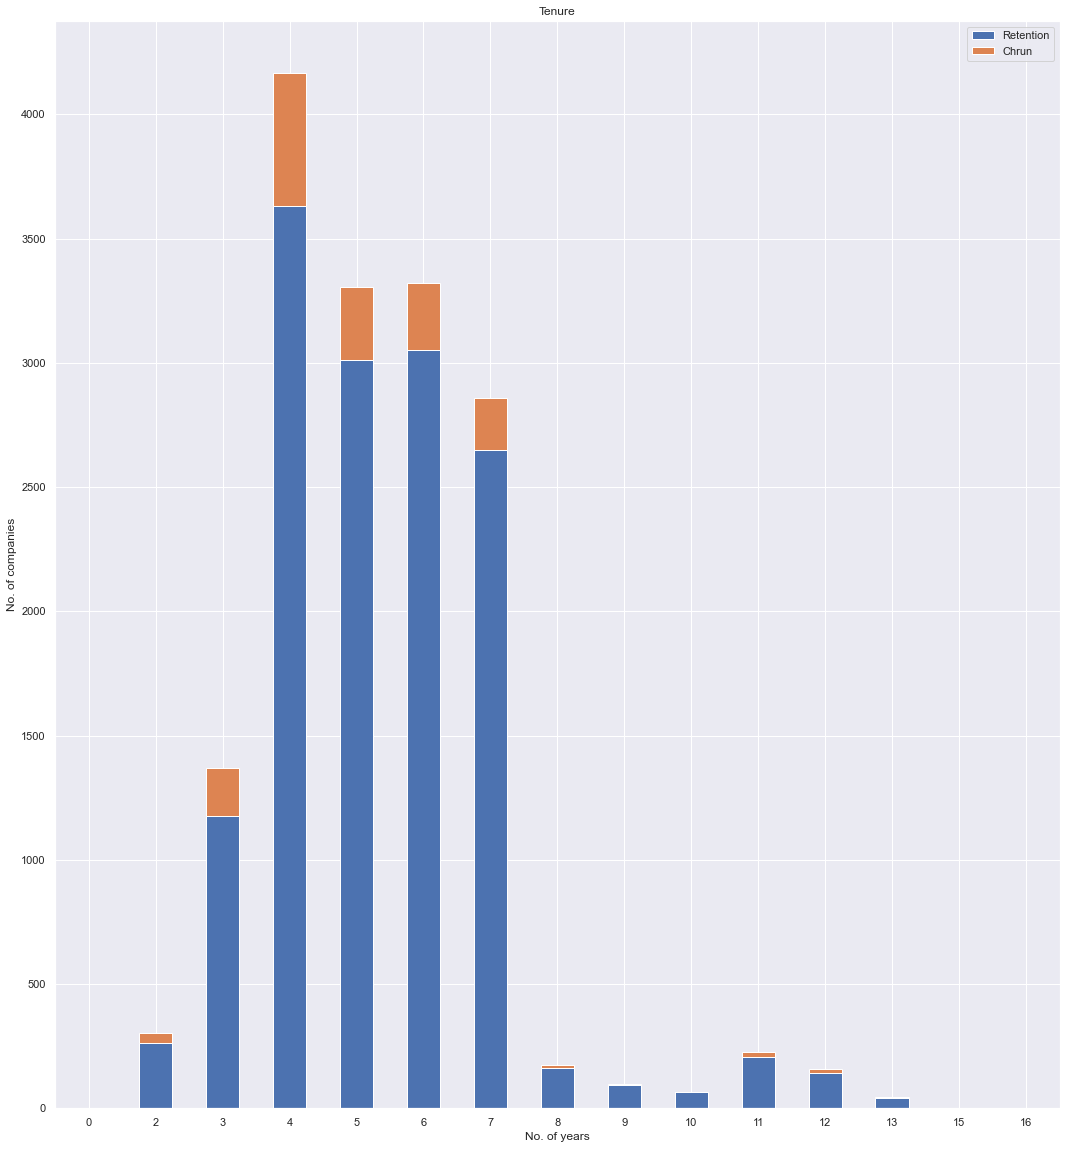

In [17]:
tenure.plot(kind="bar", figsize=(18,20), stacked=True, rot=0, title="Tenure")
plt.legend(["Retention", "Chrun"], loc="upper right")
plt.xlabel("No. of years")
plt.ylabel("No. of companies")
plt.show()

We can observed that the churn is very low for companies joined recently or joined a long time ago. Most of churnes are happened within 3-7 years.

In [18]:
def convert_months(reference_date, dataframe, column):
    time_delta = REFERENCE_DATE - dataframe[column]
    months = (time_delta / np.timedelta64(1, "M")).astype(int)
    return months

In [19]:
REFERENCE_DATE = datetime.datetime(2016,1,1)

In [20]:
train["months_activ"] = convert_months(REFERENCE_DATE, train, "date_activ")
train["months_to_end"] = -convert_months(REFERENCE_DATE, train, "date_end")
train["months_modif_prod"] = convert_months(REFERENCE_DATE, train, "date_modif_prod")
train["months_renewal"] = convert_months(REFERENCE_DATE, train, "date_renewal")

In [21]:
train["months_activ"]

0        37
1        30
2        76
3        68
4        69
         ..
16091    43
16092    40
16093    46
16094    40
16095    72
Name: months_activ, Length: 16096, dtype: int32

In [22]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
    
    temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
    temp.plot(kind="bar", figsize=(18,20), stacked=True, rot=0, title=column)
    
    plt.legend(["Rentention", "Churn"], loc="upper right")
    plt.ylabel("No. of companies")
    plt.xlabel("No. of months")
    plt.xticks(fontsize=fontsize_)
    plt.show()

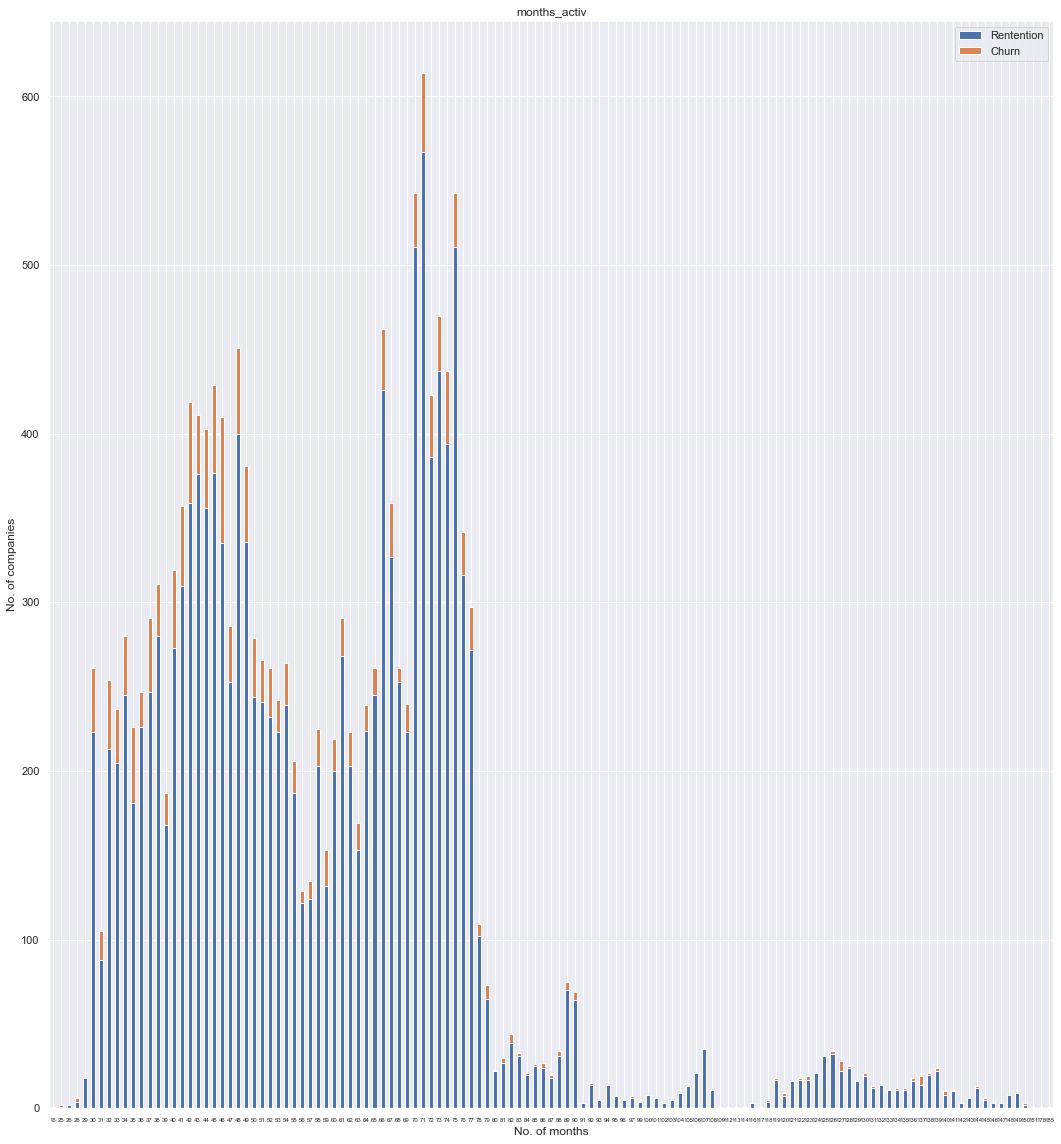

In [23]:
plot_churn_by_month(train, "months_activ", 6)

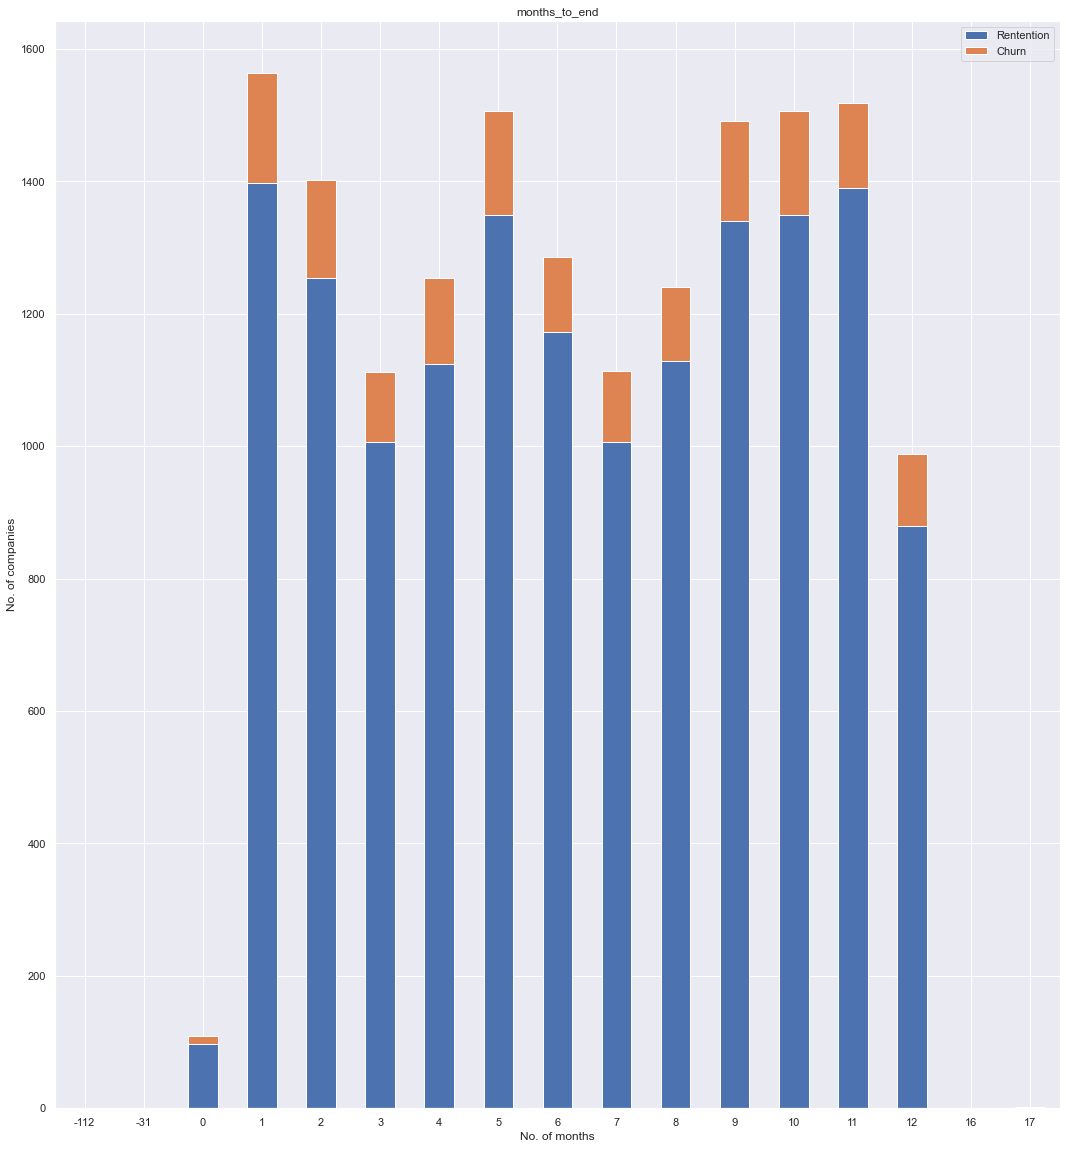

In [24]:
plot_churn_by_month(train, "months_to_end", 11)

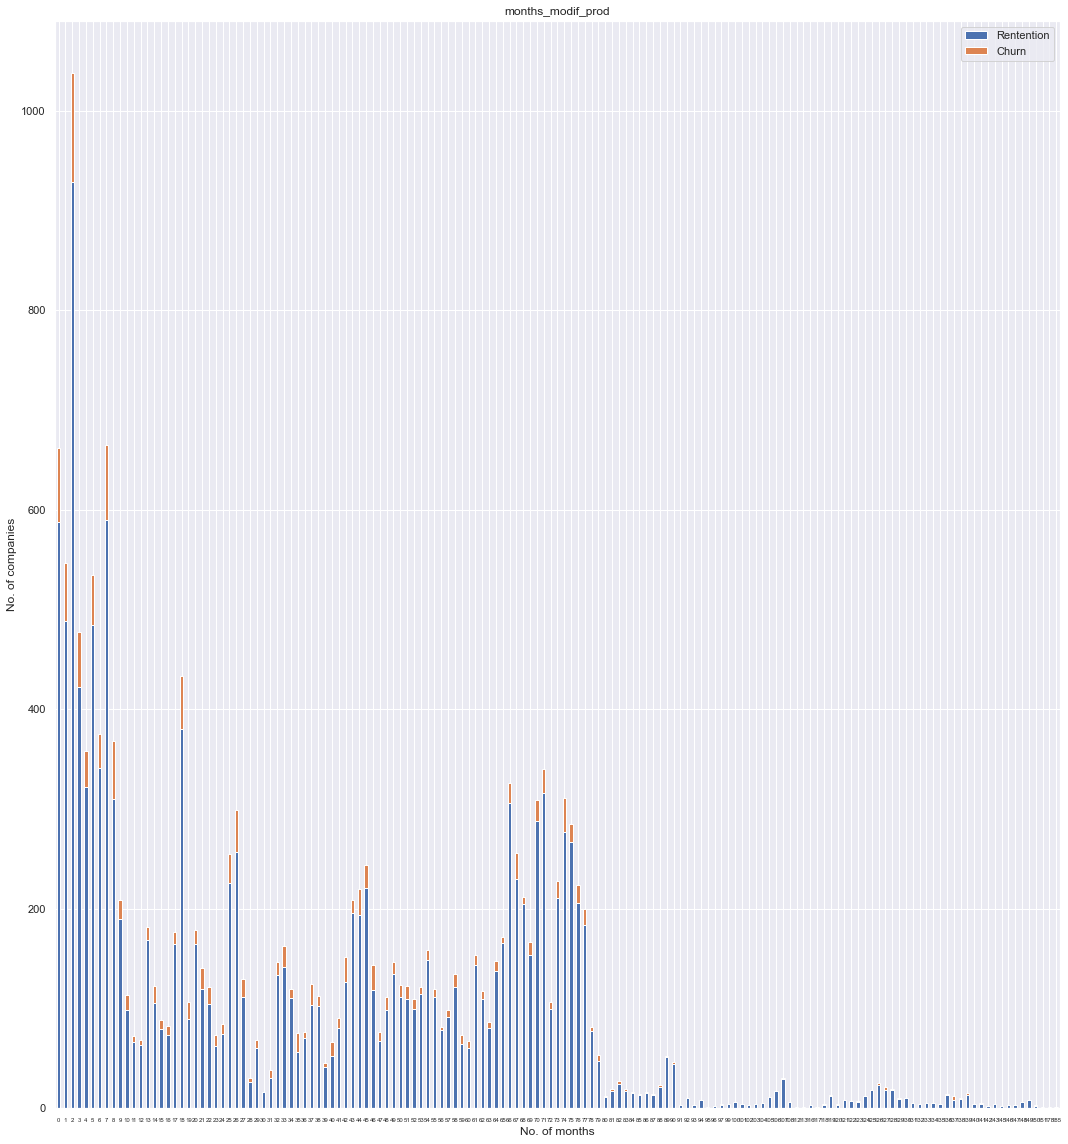

In [25]:
plot_churn_by_month(train, "months_modif_prod", 6)

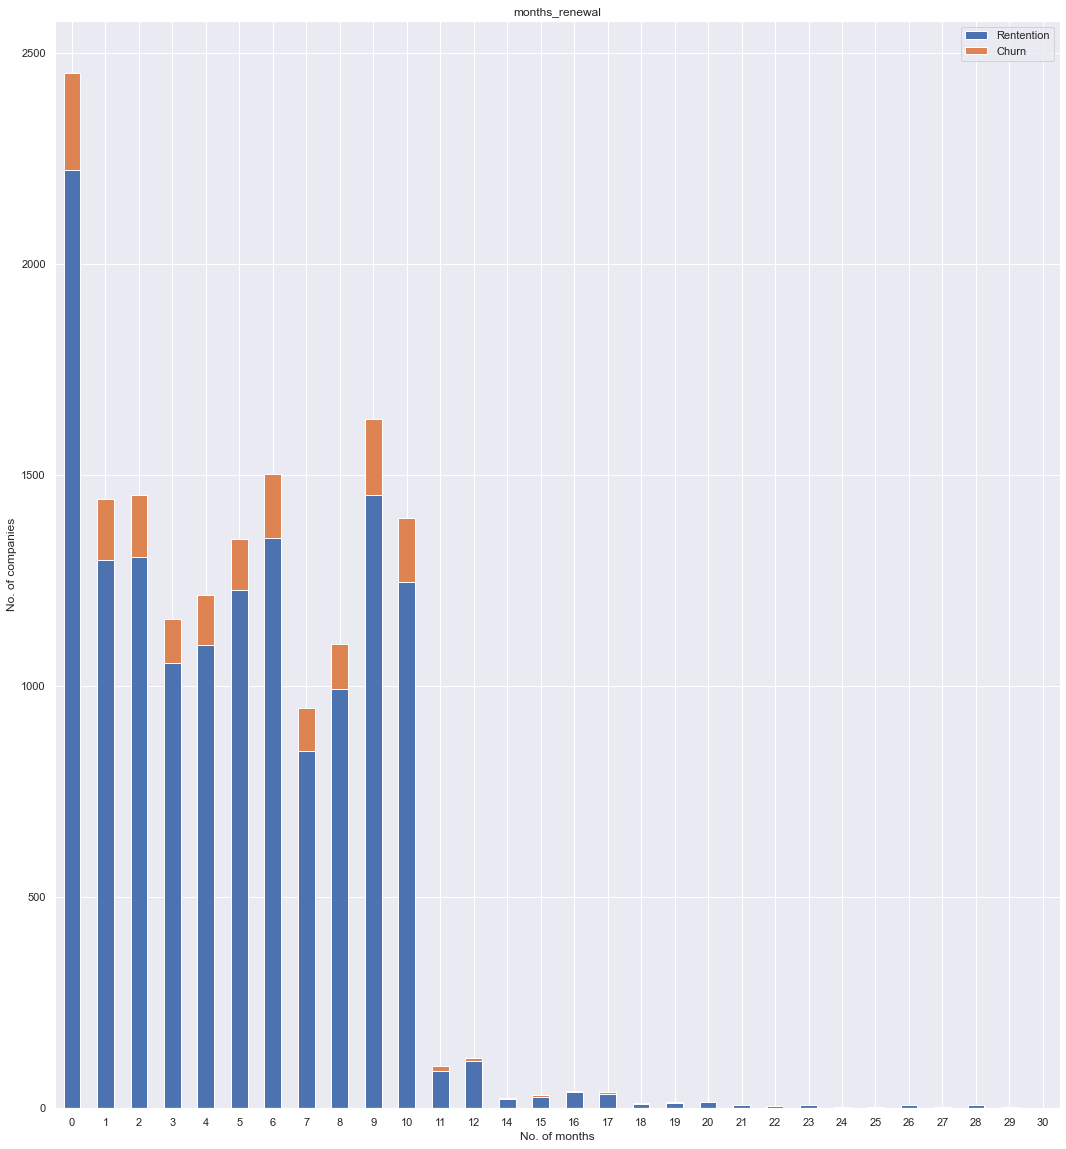

In [26]:
plot_churn_by_month(train, "months_renewal", 11)

In [27]:
train.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"], inplace=True)

### A_2. Transforming Boolean Data
Transfor has_gas column, replace t by 1 and f by 0.

In [28]:
train["has_gas"] = train["has_gas"].replace(["t", "f"], [1,0])

### A_3. Categorical Data and Dummy Variables
We cannot training our model use string data, so we will need to encode it into numerical data. We will use a method with dummy variables or onehot encoder

#### A_3_1. Categorical Data channel_sales
Let's convert each category into a new dummy variable whic will have 0s and 1s depending whether the entry belongs to that particular category or not

In [29]:
train["channel_sales"] = train["channel_sales"].fillna("null_values_channel")

In [30]:
train["channel_sales"] = train["channel_sales"].astype("category")

In [31]:
pd.DataFrame({"Samples in category": train["channel_sales"].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [32]:
categories_channel = pd.get_dummies(train["channel_sales"], prefix = "channel")

In [33]:
categories_channel.columns = [x[:11] for x in categories_channel.columns]

In [34]:
categories_channel.head(5)

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [35]:
categories_channel.drop(columns = ["channel_nul"], inplace=True)

#### A_3_2. Categorical Data origin_up

In [36]:
train["origin_up"] = train["origin_up"].fillna("null_values_origin")

In [37]:
train["origin_up"] = train["origin_up"].astype("category")

In [38]:
pd.DataFrame({"Samples in category": train["origin_up"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [39]:
categories_origin = pd.get_dummies(train["origin_up"], prefix = "origin")
categories_origin.columns = [x[:10] for x in categories_origin.columns]

In [40]:
categories_origin.head(5)

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [41]:
categories_origin.drop(columns=["origin_nul"], inplace = True)

#### A_3_3. Categorical Data activity_new

In [42]:
train["activity_new"] = train["activity_new"].fillna("null_values_activity")

In [43]:
categories_activity = pd.DataFrame({"Activity samples": train["activity_new"].value_counts()})
categories_activity

,Activity samples
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
exmccxcauwolkacaceedipbcmodfedfl,1
laslwixpcspcffiadlfkeosicpsuaboc,1
opemwsspmskladcbclpkmilallxmiook,1
mcufpoekpaeboepkkkmoxcmcmlxcwedd,1


In [44]:
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)

In [45]:
train["activity_new"] = train["activity_new"].replace(to_replace, "null_value_activity")

In [46]:
categories_activity = pd.get_dummies(train["activity_new"], prefix = "activity")
categories_activity.columns = [x[:12] for x in categories_activity.columns]

In [47]:
categories_activity.head(5)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [48]:
categories_activity.drop(columns=["activity_nul"], inplace = True)

#### A_3_4. Merge Dummy Variables to Main Dataframe

In [49]:
train = pd.merge(train, categories_channel, left_index=True, right_index=True)
train = pd.merge(train, categories_origin, left_index=True, right_index=True)
train = pd.merge(train, categories_activity, left_index=True, right_index=True)

In [50]:
train.drop(columns=["channel_sales", "origin_up", "activity_new"], inplace=True)

### A_4. Log Transformation
From Step 1, we observed that there are a lot of vaiables highly skewed to the right. Let's reduce the skewness by using log.

In [51]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,0.184145,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.329958,58.929858,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,0.387615,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796,1.749248,20.125024,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,16.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,0.000000,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,0.000000,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,1.000000,15042.790000

In [52]:
# Remove negative values
train.loc[train.cons_12m < 0, "cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0, "cons_gas_12m"] = np.nan
train.loc[train.cons_last_month < 0, "cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0, "forecast_cons_12m"] = np.nan
train.loc[train.forecast_cons_year < 0, "forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0, "forecast_meter_rent_12m"] = np.nan
train.loc[train.imp_cons < 0, "imp_cons"] = np.nan

In [53]:
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log10(train["imp_cons"]+1)

<AxesSubplot:xlabel='imp_cons', ylabel='Count'>

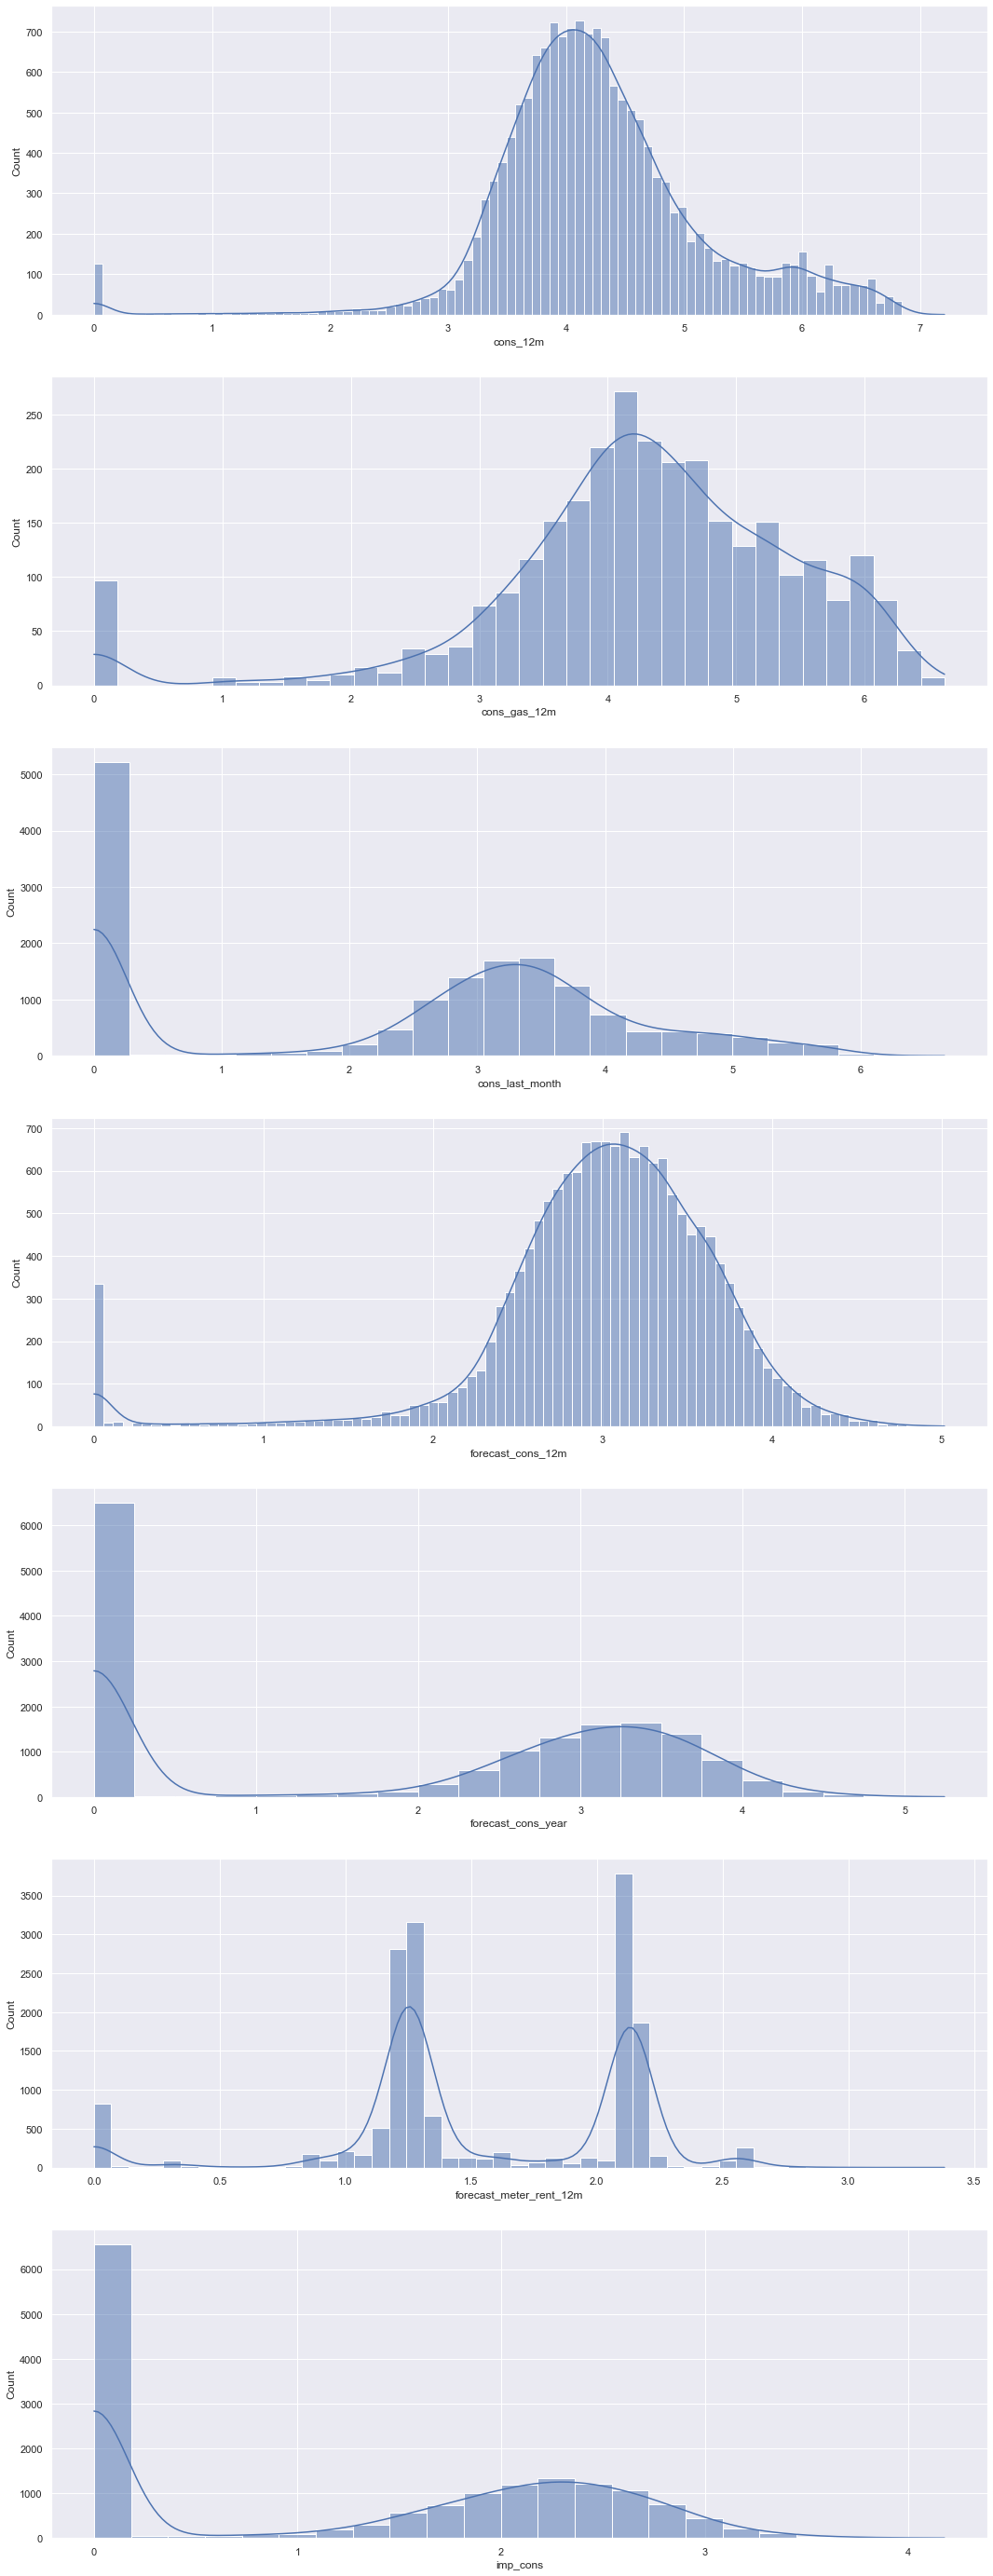

In [54]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
sns.histplot((train["cons_12m"].dropna()), kde=True, ax=axs[0])
sns.histplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()),kde=True, ax=axs[1])
sns.histplot((train["cons_last_month"].dropna()),kde=True, ax=axs[2])
sns.histplot((train["forecast_cons_12m"].dropna()),kde=True, ax=axs[3])
sns.histplot((train["forecast_cons_year"].dropna()),kde=True, ax=axs[4])
sns.histplot((train["forecast_meter_rent_12m"].dropna()),kde=True, ax=axs[5])
sns.histplot((train["imp_cons"].dropna()),kde=True, ax=axs[6])

C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\

<AxesSubplot:xlabel='imp_cons'>

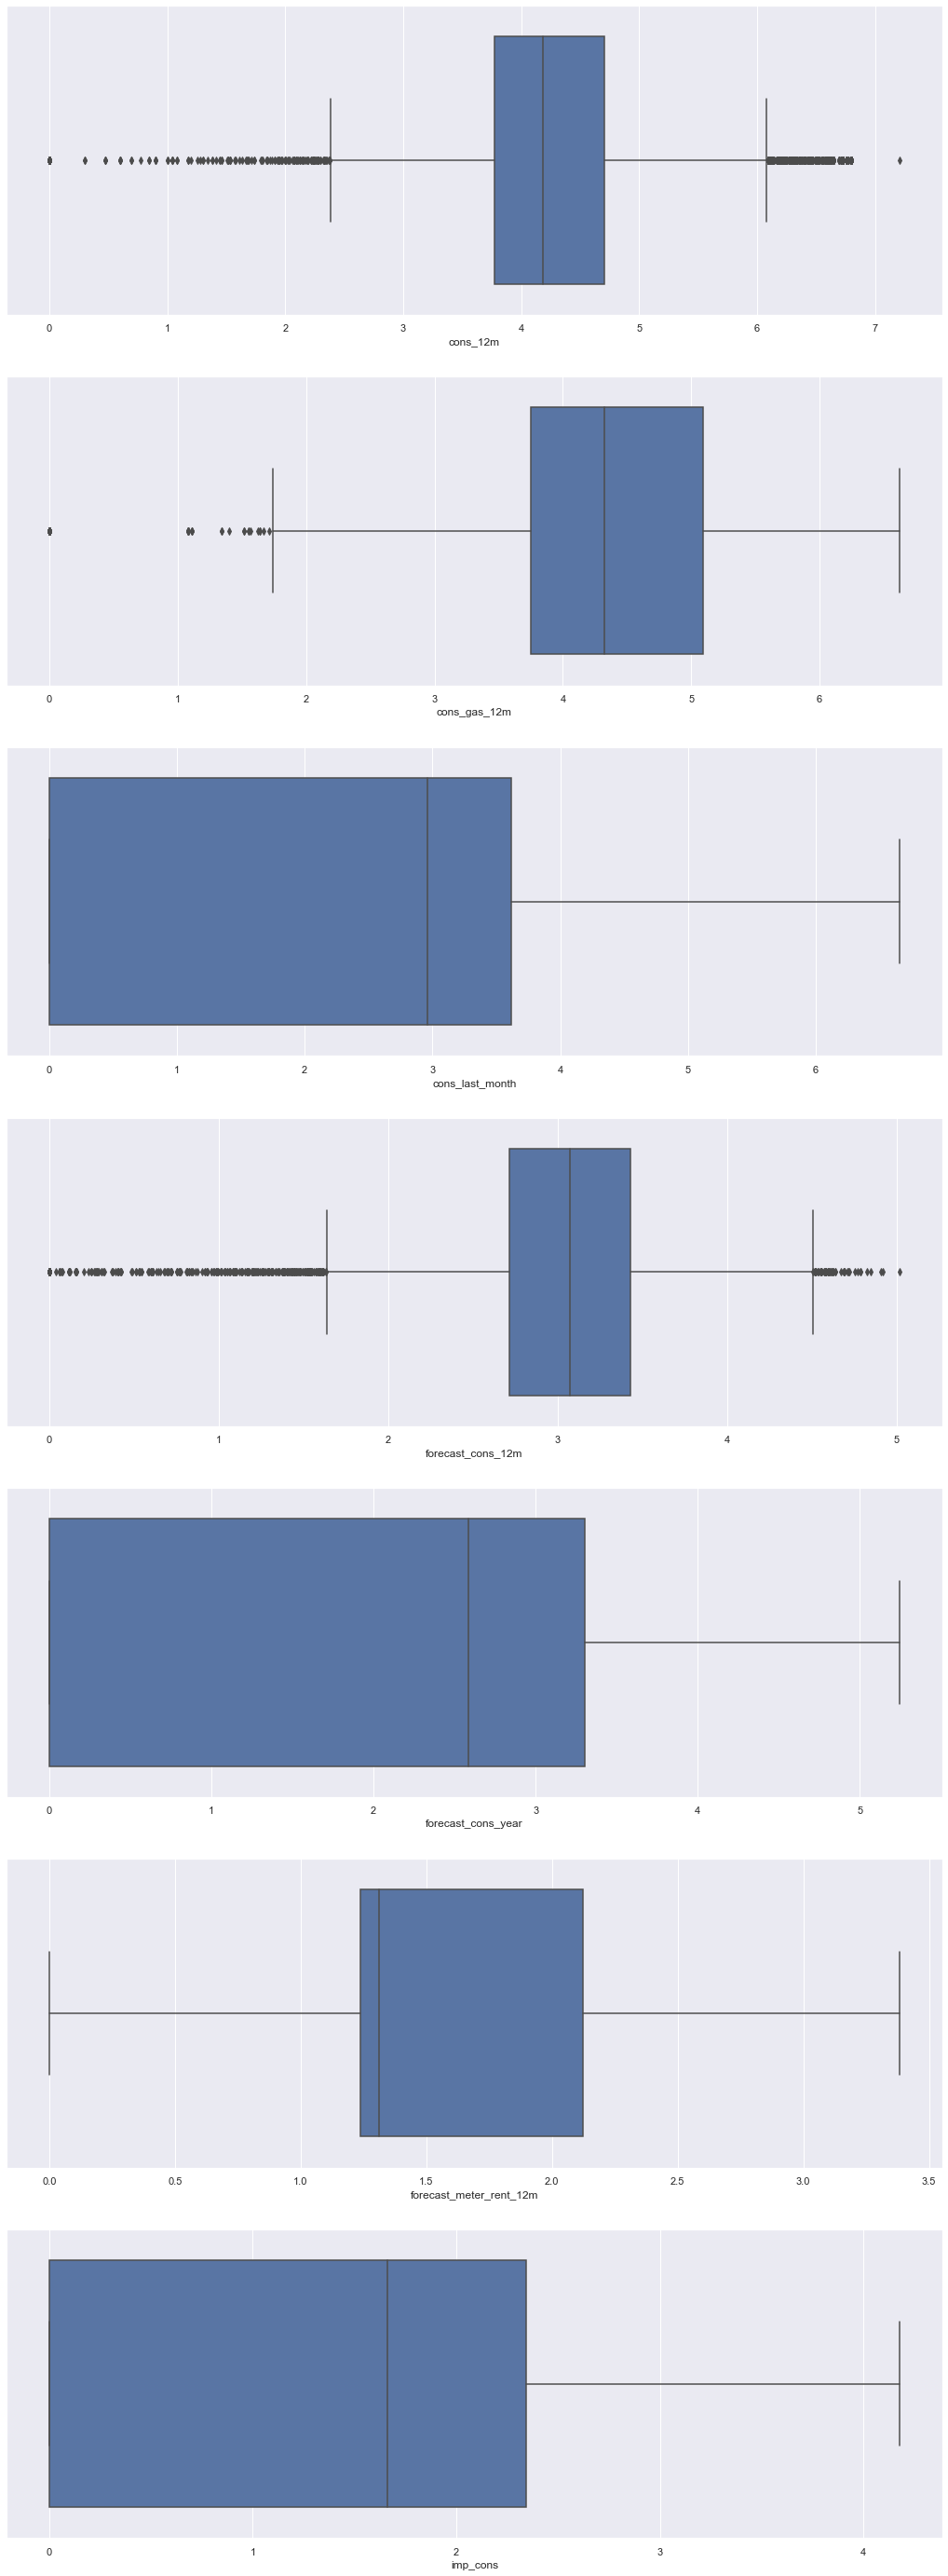

In [55]:
fig, axs = plt.subplots(nrows=7, figsize=(18, 50))
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])

In [56]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,16096.000000,16069.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,0.184145,1.305021,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.329958,58.929858,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.160969,0.589394,0.026252,0.048617,5.212252,0.387615,1.165532,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796,1.749248,20.125024,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,0.000000,0.000000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,16.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,0.000000,1.662380,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,0.000000,2.341118,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,1.000000,4.177357,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,16.000000,185.000000,17.000000,185.000000,30.000000,1.000000,1.000000,1.000000,1.00

Right now the distribution of our data is much more closer to normal distributions.

## B. Variable Correlation

In [57]:
correlation = features.corr()
correlation

,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
mean_year_price_p1_var,1.000000,-0.350104,-0.618191,0.418768,-0.652083,-0.592227,0.422491,-0.651410,-0.592401
mean_year_price_p2_var,-0.350104,1.000000,0.828166,-0.103468,0.803035,0.814689,-0.104854,0.804406,0.814826
mean_year_price_p3_var,-0.618191,0.828166,1.000000,-0.141274,0.974711,0.980425,-0.143798,0.974884,0.980604
mean_year_price_p1_fix,0.418768,-0.103468,-0.141274,1.000000,-0.001852,-0.257934,0.999992,-0.002247,-0.257415
mean_year_price_p2_fix,-0.652083,0.803035,0.974711,-0.001852,1.000000,0.926810,-0.004795,0.999997,0.927117
mean_year_price_p3_fix,-0.592227,0.814689,0.980425,-0.257934,0.926810,1.000000,-0.260119,0.927081,1.000000
mean_year_price_p1,0.422491,-0.104854,-0.143798,0.999992,-0.004795,-0.260119,1.000000,-0.005185,-0.259602
mean_year_price_p2,-0.651410,0.804406,0.974884,-0.002247,0.999997,0.927081,-0.005185,1.000000,0.927386
mean_year_price_p3,-0.592401,0.814826,0.980604,-0.257415,0.927117,1.000000,-0.259602,0.927386,1.000000


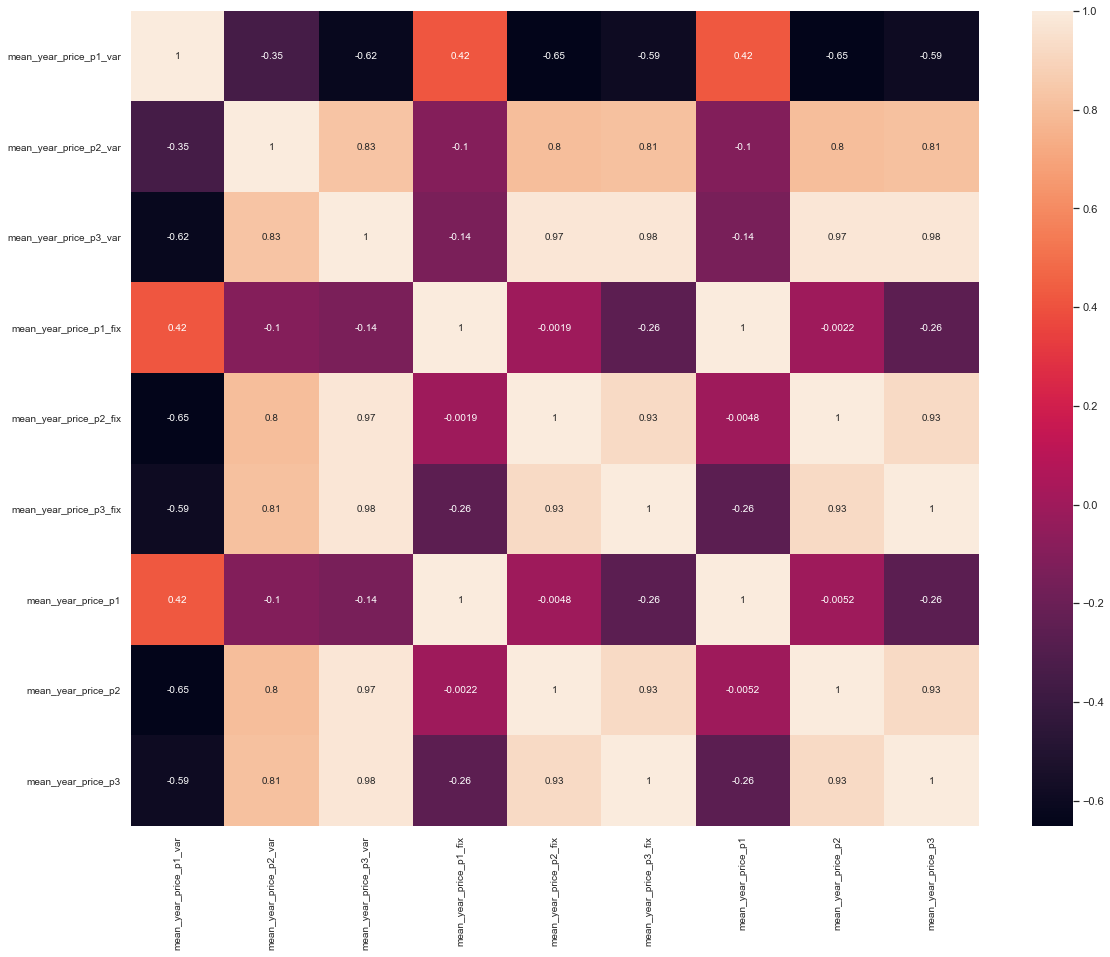

In [58]:
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values, annot = True, annot_kws={'size': 10})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [59]:
correlation = train.corr()

In [60]:
correlation

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
cons_12m,1.000000,0.228876,0.647210,0.581020,0.353134,-0.033156,0.233436,-0.194707,0.303323,-0.108078,0.168852,0.364006,-0.114627,-0.066811,0.144748,0.365112,0.030641,0.224916,-0.024490,-0.006615,0.019372,-0.088035,0.070317,0.077446,0.002843,-0.070605,0.009382,-0.026563,0.294467,-0.005790,-0.138270,-0.006706,0.020662,-0.010565,-0.009603,0.003803,0.573379,0.004237,-0.002542,-0.018361,0.031016,0.013529,0.051092,0.017331,-0.012274
cons_gas_12m,0.228876,1.000000,0.179728,0.112772,0.083303,0.002812,0.059915,-0.037409,0.078407,-0.048262,0.942306,0.091496,-0.021467,-0.009342,0.421692,0.089125,0.014065,0.051271,-0.032935,0.011128,0.011814,0.005104,0.007109,-0.000393,0.005474,-0.007765,0.012995,-0.048543,0.050488,-0.005834,-0.018948,-0.003608,0.008502,-0.003094,-0.005927,-0.005102,0.143979,0.027603,-0.016975,0.015216,0.043359,0.034373,0.097908,0.000596,-0.033529
cons_last_month,0.647210,0.179728,1.000000,0.333177,0.789374,-0.021204,0.341073,-0.273247,0.413813,-0.094703,0.137190,0.777624,-0.039002,-0.008143,0.114088,0.267391,0.050017,0.234859,-0.023364,0.011795,0.038647,-0.080431,0.069307,0.063654,0.008650,-0.071768,0.002424,0.000852,0.208514,-0.005894,-0.121423,-0.010410,-0.039458,-0.004759,0.039700,0.009611,0.446227,0.016078,0.005268,-0.010820,0.023280,0.003816,0.040482,0.009532,-0.006628
forecast_cons_12m,0.581020,0.112772,0.333177,1.000000,0.401819,0.043227,0.270671,-0.032467,0.256314,0.112277,0.095316,0.463428,-0.157408,-0.114057,0.034239,0.481463,-0.037348,0.233619,0.007372,-0.048758,-0.039808,-0.079941,-0.076897,0.085616,0.009414,-0.016402,0.001854,0.049779,0.085574,0.007597,-0.048166,-0.003638,-0.046517,0.000944,0.041074,-0.000067,0.130510,0.006886,-0.017893,-0.017681,0.079414,0.010944,0.097650,0.003208,0.007251
forecast_cons_year,0.353134,0.083303,0.789374,0.401819,1.000000,0.003224,0.410313,-0.334239,0.447548,-0.102624,0.066965,0.984669,-0.041390,-0.012083,0.042012,0.299959,0.054251,0.268242,-0.000794,0.028669,0.049142,-0.051053,0.011102,0.043589,0.014375,-0.041463,0.000573,0.043936,0.046737,0.001759,-0.072691,-0.009146,-0.107257,0.012300,0.085713,0.008968,0.130788,0.011343,-0.002286,-0.009017,0.053148,-0.006160,0.066759,-0.002161,-0.000439
forecast_discount_energy,-0.033156,0.002812,-0.021204,0.043227,0.003224,1.000000,-0.014334,0.319202,0.049174,0.024477,0.005876,0.015988,0.199609,0.151140,0.055162,0.013500,-0.071723,-0.022646,0.012344,-0.098420,-0.072511,-0.057105,-0.182632,0.196117,-0.003041,0.000107,-0.002150,0.050264,-0.047912,-0.005269,0.035136,-0.001520,-0.053621,-0.031940,0.074035,-0.002150,-0.060098,0.007023,-0.009534,0.005600,-0.001376,-0.012893,0.008260,-0.004775,0.001412
forecast_meter_rent_12m,0.233436,0.059915,0.341073,0.270671,0.410313,-0.014334,1.000000,-0.453746,0.649773,0.003275,0.046967,0.395690,0.020926,0.039695,-0.001289,0.247628,0.076301,0.375352,0.030921,0.060870,0.076190,-0.040734,0.018847,0.030467,0.014208,-0.017418,0.001856,0.024179,0.021189,-0.017069,-0.074647,-0.006370,-0.075325,0.077678,0.001382,-0.003832,0.045232,0.038122,0.010088,0.000704,0.055416,0.026596,0.072715,-0.009586,0.004582
forecast_price_energy_p1,-0.194707,-0.037409,-0.273247,-0.032467,-0.334239,0.319202,-0.453746,1.000000,-0.364849,0.389218,-0.026941,-0.275551,0.184782,0.029119,0.025854,-0.185221,-0.199922,-0.352961,-0.003337,-0.176921,-0.197879,-0.017502,-0.120873,0.076147,-0.014397,0.029368,0.002077,0.015210,-0.0

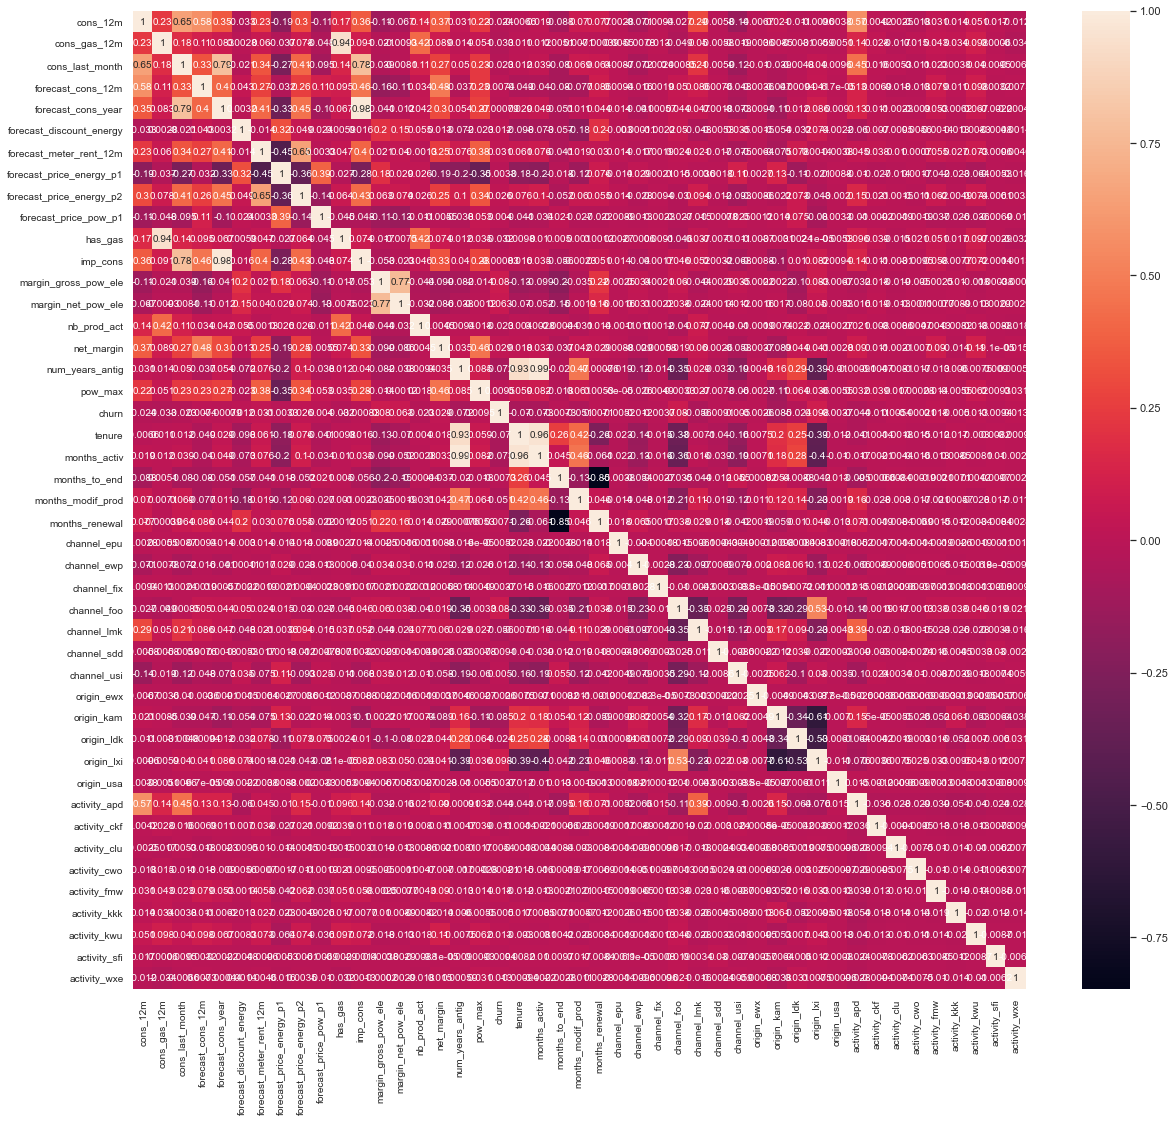

In [61]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values, annot = True, annot_kws={'size': 10})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [62]:
train.drop(columns = ["num_years_antig", "forecast_cons_year"], inplace = True)

We can find that num_years_antig has a high correlation with months_activ, and forecast_cons_year has a high correlation with imp_cons. We can remove variables with very high correlation.

## C. Removing Outliers
Let's find the outliers based on the z score and we will replace the outliers with the mean.

In [63]:
def replace_outliers_z_score(dataframe, column, z=3):
    
    from scipy.stats import zscore
    
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -z) & (df["zscore"] < z)][column].mean()
    
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -z) | (dataframe["zscore"] > z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -z) | (dataframe["zscore"] > z), column] = mean_
    
    print("Replaced: ", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [64]:
for c in features.columns:
    if c != "id":
        features = replace_outliers_z_score(features, c)

Replaced:  276  outliers in  mean_year_price_p1_var
Replaced:  0  outliers in  mean_year_price_p2_var
Replaced:  0  outliers in  mean_year_price_p3_var
Replaced:  120  outliers in  mean_year_price_p1_fix
Replaced:  0  outliers in  mean_year_price_p2_fix
Replaced:  0  outliers in  mean_year_price_p3_fix
Replaced:  122  outliers in  mean_year_price_p1
Replaced:  0  outliers in  mean_year_price_p2
Replaced:  0  outliers in  mean_year_price_p3


In [65]:
def replace_outliers_z_score(dataframe, column, z=3):
    
    from scipy.stats import zscore
    
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
    
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -z) & (df["zscore"] < z)][column].mean()
    
    no_outliers = dataframe[column].isnull().sum()
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    dataframe.loc[(dataframe["zscore"] < -z) | (dataframe["zscore"] > z), column] = mean_
    
    print("Replaced: ", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [66]:
train = replace_outliers_z_score(train, "cons_12m")
train = replace_outliers_z_score(train, "cons_gas_12m")
train = replace_outliers_z_score(train, "cons_last_month")
train = replace_outliers_z_score(train, "forecast_cons_12m")
train = replace_outliers_z_score(train, "forecast_discount_energy")
train = replace_outliers_z_score(train, "forecast_meter_rent_12m")
train = replace_outliers_z_score(train, "forecast_price_energy_p1")
train = replace_outliers_z_score(train, "forecast_price_energy_p2")
train = replace_outliers_z_score(train, "forecast_price_pow_p1")
train = replace_outliers_z_score(train, "imp_cons")
train = replace_outliers_z_score(train, "margin_gross_pow_ele")
train = replace_outliers_z_score(train, "margin_net_pow_ele")
train = replace_outliers_z_score(train, "net_margin")
train = replace_outliers_z_score(train, "pow_max")
train = replace_outliers_z_score(train, "months_activ")
train = replace_outliers_z_score(train, "months_to_end")
train = replace_outliers_z_score(train, "months_modif_prod")
train = replace_outliers_z_score(train, "months_renewal")

Replaced:  27  outliers in  cons_12m
Replaced:  6  outliers in  cons_gas_12m
Replaced:  46  outliers in  cons_last_month
Replaced:  41  outliers in  forecast_cons_12m
Replaced:  126  outliers in  forecast_discount_energy
Replaced:  4  outliers in  forecast_meter_rent_12m
Replaced:  126  outliers in  forecast_price_energy_p1
Replaced:  126  outliers in  forecast_price_energy_p2
Replaced:  126  outliers in  forecast_price_pow_p1
Replaced:  27  outliers in  imp_cons
Replaced:  13  outliers in  margin_gross_pow_ele
Replaced:  13  outliers in  margin_net_pow_ele
Replaced:  15  outliers in  net_margin
Replaced:  3  outliers in  pow_max
Replaced:  0  outliers in  months_activ
Replaced:  0  outliers in  months_to_end
Replaced:  0  outliers in  months_modif_prod
Replaced:  0  outliers in  months_renewal


In [67]:
train.reset_index(drop=True, inplace=True)

C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HE\anaconda3\lib\site-packages\

<function matplotlib.pyplot.show(close=None, block=None)>

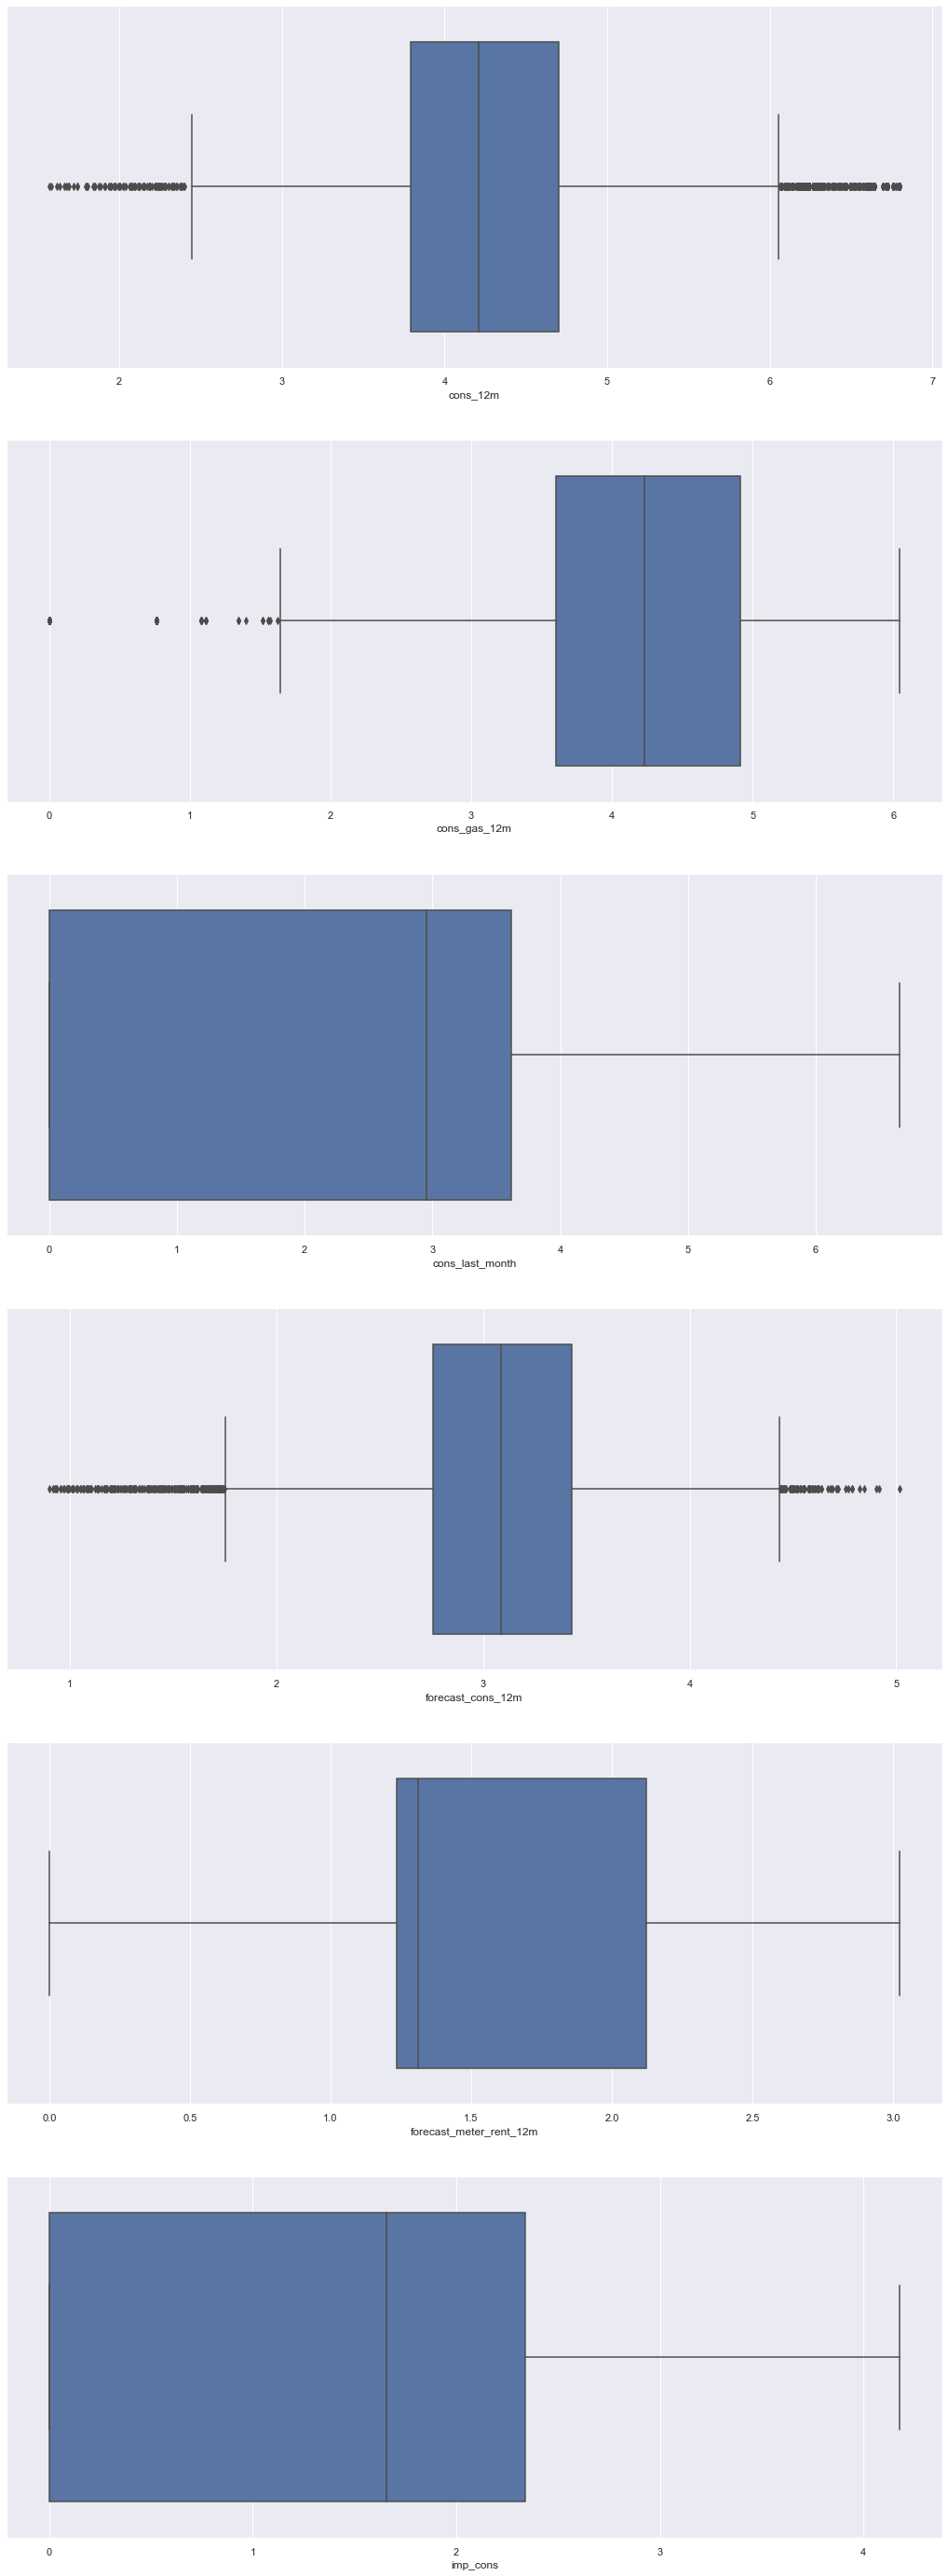

In [68]:
fig, axs = plt.subplots(nrows=6, figsize=(18, 50))
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[4])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[5])
plt.show

## D. Pickling

In [69]:
pd.to_pickle(train, "processed_data train_data step2.pkl")
pd.to_pickle(history_data, "processed_data history_data step2.pkl")